# 📈 LSTM - Predicción de Series Temporales de Delitos
## Long Short-Term Memory para Análisis Temporal

---

### Objetivos:
1. Preparar secuencias temporales de delitos
2. Construir modelo LSTM para predicción
3. Entrenar y validar el modelo
4. Predecir tendencias futuras
5. Evaluar con métricas de regresión (MAE, RMSE, MAPE)

**Autor**: Adonnay Bazaldua  
**Fecha**: Noviembre 2026

## 1. Importación de Librerías

In [1]:
# Deep Learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, callbacks

# Procesamiento de datos
import numpy as np
import pandas as pd
import pickle
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Métricas
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Utils
import os
import warnings
warnings.filterwarnings('ignore')

# Set random seeds
np.random.seed(42)
tf.random.set_seed(42)

print(f"✅ TensorFlow version: {tf.__version__}")
print(f"✅ GPU disponible: {len(tf.config.list_physical_devices('GPU')) > 0}")

2025-12-02 17:26:25.451736: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-02 17:26:25.907056: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1764717986.122544   31901 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1764717986.180521   31901 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1764717986.533962   31901 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

✅ TensorFlow version: 2.19.0
✅ GPU disponible: True


## 2. Carga de Datos de Series Temporales

In [2]:
print("📂 Cargando datos de series temporales...\n")

# Cargar datos agregados por día
df_timeseries = pd.read_csv('/home/adonnay_bazaldua/Documentos/GitHub/Crime-Analysis-in-Mexico-City-using-Neural-Networks/data/processed_data/processed_data/timeseries_data.csv')
df_timeseries['fecha'] = pd.to_datetime(df_timeseries['fecha'])
df_timeseries = df_timeseries.sort_values('fecha').reset_index(drop=True)

print(f"✅ Datos cargados:")
print(f"   Período: {df_timeseries['fecha'].min()} a {df_timeseries['fecha'].max()}")
print(f"   Total de días: {len(df_timeseries)}")
print(f"   Features: {len(df_timeseries.columns) - 1} (excluyendo fecha)")

print(f"\n📊 Estadísticas de delitos totales por día:")
print(df_timeseries['total_delitos'].describe())

# Mostrar primeras filas
print(f"\n🔍 Primeras 5 filas:")
print(df_timeseries.head())

📂 Cargando datos de series temporales...

✅ Datos cargados:
   Período: 2012-01-01 00:00:00 a 2025-02-01 00:00:00
   Total de días: 4753
   Features: 19 (excluyendo fecha)

📊 Estadísticas de delitos totales por día:
count    4753.000000
mean      418.925521
std       277.747899
min         1.000000
25%        26.000000
50%       537.000000
75%       633.000000
max      1200.000000
Name: total_delitos, dtype: float64

🔍 Primeras 5 filas:
       fecha  DELITO DE BAJO IMPACTO  FEMINICIDIO  HECHO NO DELICTIVO  \
0 2012-01-01                    79.0          0.0                11.0   
1 2012-01-02                     5.0          0.0                 0.0   
2 2012-01-03                     1.0          0.0                 0.0   
3 2012-01-04                     5.0          0.0                 2.0   
4 2012-01-05                     7.0          0.0                 0.0   

   HOMICIDIO DOLOSO  LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO  \
0               0.0                               

## 3. Visualización de la Serie Temporal

FileNotFoundError: [Errno 2] No such file or directory: 'models/lstm_timeseries_overview.png'

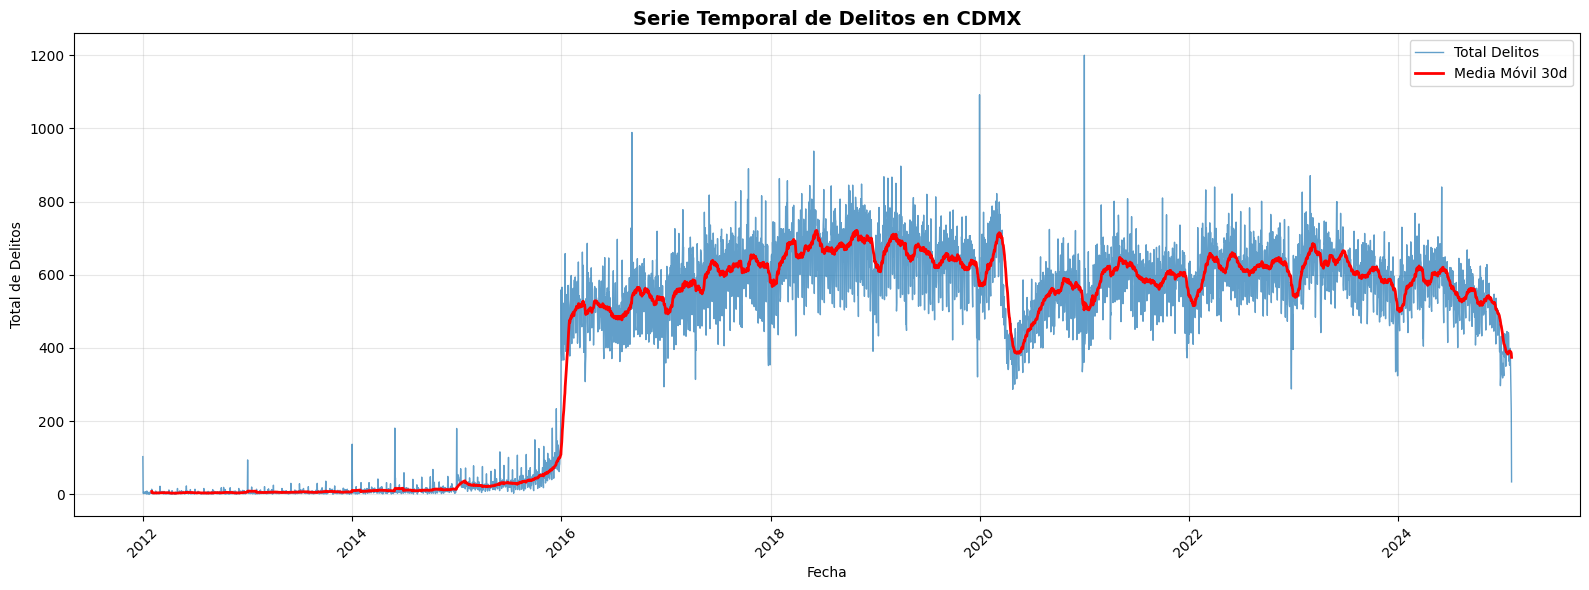

In [3]:
# Visualización interactiva con Plotly
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df_timeseries['fecha'],
    y=df_timeseries['total_delitos'],
    mode='lines',
    name='Total Delitos',
    line=dict(color='steelblue', width=1.5)
))

# Media móvil de 30 días
df_timeseries['ma_30'] = df_timeseries['total_delitos'].rolling(window=30).mean()

fig.add_trace(go.Scatter(
    x=df_timeseries['fecha'],
    y=df_timeseries['ma_30'],
    mode='lines',
    name='Media Móvil 30 días',
    line=dict(color='coral', width=2, dash='dash')
))

fig.update_layout(
    title='Serie Temporal de Delitos en CDMX (2016-2024)',
    xaxis_title='Fecha',
    yaxis_title='Número de Delitos por Día',
    hovermode='x unified',
    height=500
)

fig.show()

# También con matplotlib para guardar
fig_static, ax = plt.subplots(figsize=(16, 6))
ax.plot(df_timeseries['fecha'], df_timeseries['total_delitos'], 
        linewidth=1, alpha=0.7, label='Total Delitos')
ax.plot(df_timeseries['fecha'], df_timeseries['ma_30'], 
        linewidth=2, color='red', label='Media Móvil 30d')
ax.set_xlabel('Fecha')
ax.set_ylabel('Total de Delitos')
ax.set_title('Serie Temporal de Delitos en CDMX', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('models/lstm_timeseries_overview.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Visualización guardada en 'models/lstm_timeseries_overview.png'")

## 4. Preparación de Secuencias para LSTM

LSTM requiere datos en formato de secuencias: usaremos ventanas de 30 días para predecir el día siguiente.

In [4]:
def create_sequences(data, seq_length):
    """
    Crea secuencias de entrenamiento para LSTM.
    
    Args:
        data: Array de datos temporales
        seq_length: Longitud de la secuencia (ventana temporal)
    
    Returns:
        X: Secuencias de entrada (samples, seq_length, features)
        y: Valores objetivo (samples,)
    """
    X, y = [], []
    
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    
    return np.array(X), np.array(y)

print("🔧 Preparando secuencias para LSTM...\n")

# Usar solo la columna de total_delitos para simplificar
# (Se puede expandir a múltiples features después)
data = df_timeseries['total_delitos'].values.reshape(-1, 1)

# Normalizar datos (LSTM funciona mejor con datos normalizados)
scaler_lstm = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler_lstm.fit_transform(data)

# Parámetros
SEQ_LENGTH = 30  # Usar 30 días anteriores

# Crear secuencias
X_seq, y_seq = create_sequences(data_scaled, SEQ_LENGTH)

print(f"✅ Secuencias creadas:")
print(f"   Shape X: {X_seq.shape}  # (samples, timesteps, features)")
print(f"   Shape y: {y_seq.shape}  # (samples,)")
print(f"   Timesteps: {SEQ_LENGTH} días")

# División train/val/test: 70%, 15%, 15%
train_size = int(0.70 * len(X_seq))
val_size = int(0.15 * len(X_seq))

X_train_lstm = X_seq[:train_size]
y_train_lstm = y_seq[:train_size]

X_val_lstm = X_seq[train_size:train_size + val_size]
y_val_lstm = y_seq[train_size:train_size + val_size]

X_test_lstm = X_seq[train_size + val_size:]
y_test_lstm = y_seq[train_size + val_size:]

print(f"\n📊 División de datos:")
print(f"   Train: {X_train_lstm.shape[0]} secuencias ({X_train_lstm.shape[0]/len(X_seq)*100:.1f}%)")
print(f"   Val:   {X_val_lstm.shape[0]} secuencias ({X_val_lstm.shape[0]/len(X_seq)*100:.1f}%)")
print(f"   Test:  {X_test_lstm.shape[0]} secuencias ({X_test_lstm.shape[0]/len(X_seq)*100:.1f}%)")

🔧 Preparando secuencias para LSTM...

✅ Secuencias creadas:
   Shape X: (4723, 30, 1)  # (samples, timesteps, features)
   Shape y: (4723, 1)  # (samples,)
   Timesteps: 30 días

📊 División de datos:
   Train: 3306 secuencias (70.0%)
   Val:   708 secuencias (15.0%)
   Test:  709 secuencias (15.0%)


## 5. Construcción del Modelo LSTM

### Arquitectura:
```
Input(30, 1)  # 30 timesteps, 1 feature
  → LSTM(128, return_sequences=True) → Dropout(0.2)
  → LSTM(64) → Dropout(0.2)
  → Dense(32, activation='relu')
  → Dense(1, activation='linear')  # Predicción de conteo
```

In [5]:
def create_lstm_model(seq_length, n_features, learning_rate=0.001):
    """
    Crea modelo LSTM para predicción de series temporales.
    
    Args:
        seq_length: Longitud de la secuencia de entrada
        n_features: Número de features
        learning_rate: Tasa de aprendizaje
    
    Returns:
        Modelo LSTM compilado
    """
    model = models.Sequential([
        # Input layer
        layers.Input(shape=(seq_length, n_features)),
        
        # Primera capa LSTM (con return_sequences=True para apilar)
        layers.LSTM(128, return_sequences=True, activation='tanh', recurrent_dropout=0.1),
        layers.Dropout(0.2),
        
        # Segunda capa LSTM
        layers.LSTM(64, activation='tanh', recurrent_dropout=0.1),
        layers.Dropout(0.2),
        
        # Capa densa
        layers.Dense(32, activation='relu'),
        
        # Capa de salida (regresión)
        layers.Dense(1, activation='linear')
    ], name='LSTM_Crime_Predictor')
    
    # Compilar
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss='mse',  # Mean Squared Error para regresión
        metrics=['mae', 'mse']
    )
    
    return model

# Crear modelo
print("🏗️ Construyendo modelo LSTM...\n")
lstm_model = create_lstm_model(seq_length=SEQ_LENGTH, n_features=1)

# Resumen
lstm_model.summary()

# Contar parámetros
total_params = lstm_model.count_params()
print(f"\n📊 Total de parámetros: {total_params:,}")

🏗️ Construyendo modelo LSTM...



I0000 00:00:1764718042.695876   31901 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 4164 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 6GB Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


Model: "LSTM_Crime_Predictor"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 30, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,081 (461.25 KB)

 Trainable params: 118,081 (461.25 KB)

 Non-trainable params: 0 (0.00 B)


📊 Total de parámetros: 118,081


## 6. Configuración de Callbacks

In [6]:
# Callbacks
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=7,
    min_lr=1e-7,
    verbose=1
)

model_checkpoint = callbacks.ModelCheckpoint(
    'models/lstm_best.keras',
    monitor='val_mae',
    save_best_only=True,
    verbose=1
)

tensorboard_callback = callbacks.TensorBoard(
    log_dir='logs/lstm',
    histogram_freq=1
)

callbacks_list = [early_stopping, reduce_lr, model_checkpoint, tensorboard_callback]

print("✅ Callbacks configurados")

✅ Callbacks configurados


## 7. Entrenamiento del Modelo

In [7]:
print("🚀 Iniciando entrenamiento LSTM...\n")

# Parámetros
BATCH_SIZE = 32
EPOCHS = 100

# Entrenar
history_lstm = lstm_model.fit(
    X_train_lstm, y_train_lstm,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(X_val_lstm, y_val_lstm),
    callbacks=callbacks_list,
    verbose=1
)

print("\n✅ Entrenamiento completado!")

🚀 Iniciando entrenamiento LSTM...

Epoch 1/100


E0000 00:00:1764718064.374165   39601 cuda_dnn.cc:522] Loaded runtime CuDNN library: 9.1.0 but source was compiled with: 9.3.0.  CuDNN library needs to have matching major version and equal or higher minor version. If using a binary install, upgrade your CuDNN library.  If building from sources, make sure the library loaded at runtime is compatible with the version specified during compile configuration.
2025-12-02 17:27:44.376948: W tensorflow/core/framework/op_kernel.cc:1857] OP_REQUIRES failed at cudnn_rnn_ops.cc:1769 : INVALID_ARGUMENT: Dnn is not supported
2025-12-02 17:27:44.377151: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: INVALID_ARGUMENT: Dnn is not supported
	 [[{{function_node __inference_one_step_on_data_3032}}{{node LSTM_Crime_Predictor_1/lstm_1/CudnnRNNV3}}]]


InvalidArgumentError: Graph execution error:

Detected at node LSTM_Crime_Predictor_1/lstm_1/CudnnRNNV3 defined at (most recent call last):
  File "/home/adonnay_bazaldua/miniconda3/envs/mic/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/home/adonnay_bazaldua/miniconda3/envs/mic/lib/python3.10/runpy.py", line 86, in _run_code

  File "/home/adonnay_bazaldua/miniconda3/envs/mic/lib/python3.10/site-packages/ipykernel_launcher.py", line 18, in <module>

  File "/home/adonnay_bazaldua/miniconda3/envs/mic/lib/python3.10/site-packages/traitlets/config/application.py", line 1075, in launch_instance

  File "/home/adonnay_bazaldua/miniconda3/envs/mic/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 739, in start

  File "/home/adonnay_bazaldua/miniconda3/envs/mic/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 211, in start

  File "/home/adonnay_bazaldua/miniconda3/envs/mic/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/home/adonnay_bazaldua/miniconda3/envs/mic/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/home/adonnay_bazaldua/miniconda3/envs/mic/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/home/adonnay_bazaldua/miniconda3/envs/mic/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 545, in dispatch_queue

  File "/home/adonnay_bazaldua/miniconda3/envs/mic/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 534, in process_one

  File "/home/adonnay_bazaldua/miniconda3/envs/mic/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell

  File "/home/adonnay_bazaldua/miniconda3/envs/mic/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 362, in execute_request

  File "/home/adonnay_bazaldua/miniconda3/envs/mic/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 778, in execute_request

  File "/home/adonnay_bazaldua/miniconda3/envs/mic/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 449, in do_execute

  File "/home/adonnay_bazaldua/miniconda3/envs/mic/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/home/adonnay_bazaldua/miniconda3/envs/mic/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3075, in run_cell

  File "/home/adonnay_bazaldua/miniconda3/envs/mic/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3130, in _run_cell

  File "/home/adonnay_bazaldua/miniconda3/envs/mic/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 128, in _pseudo_sync_runner

  File "/home/adonnay_bazaldua/miniconda3/envs/mic/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3334, in run_cell_async

  File "/home/adonnay_bazaldua/miniconda3/envs/mic/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3517, in run_ast_nodes

  File "/home/adonnay_bazaldua/miniconda3/envs/mic/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3577, in run_code

  File "/tmp/ipykernel_31901/3616741482.py", line 8, in <module>

  File "/home/adonnay_bazaldua/miniconda3/envs/mic/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/home/adonnay_bazaldua/miniconda3/envs/mic/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 371, in fit

  File "/home/adonnay_bazaldua/miniconda3/envs/mic/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 219, in function

  File "/home/adonnay_bazaldua/miniconda3/envs/mic/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 132, in multi_step_on_iterator

  File "/home/adonnay_bazaldua/miniconda3/envs/mic/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 113, in one_step_on_data

  File "/home/adonnay_bazaldua/miniconda3/envs/mic/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 57, in train_step

  File "/home/adonnay_bazaldua/miniconda3/envs/mic/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/home/adonnay_bazaldua/miniconda3/envs/mic/lib/python3.10/site-packages/keras/src/layers/layer.py", line 909, in __call__

  File "/home/adonnay_bazaldua/miniconda3/envs/mic/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/home/adonnay_bazaldua/miniconda3/envs/mic/lib/python3.10/site-packages/keras/src/ops/operation.py", line 52, in __call__

  File "/home/adonnay_bazaldua/miniconda3/envs/mic/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler

  File "/home/adonnay_bazaldua/miniconda3/envs/mic/lib/python3.10/site-packages/keras/src/models/sequential.py", line 221, in call

  File "/home/adonnay_bazaldua/miniconda3/envs/mic/lib/python3.10/site-packages/keras/src/models/functional.py", line 183, in call

  File "/home/adonnay_bazaldua/miniconda3/envs/mic/lib/python3.10/site-packages/keras/src/ops/function.py", line 171, in _run_through_graph

  File "/home/adonnay_bazaldua/miniconda3/envs/mic/lib/python3.10/site-packages/keras/src/models/functional.py", line 643, in call

  File "/home/adonnay_bazaldua/miniconda3/envs/mic/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/home/adonnay_bazaldua/miniconda3/envs/mic/lib/python3.10/site-packages/keras/src/layers/layer.py", line 909, in __call__

  File "/home/adonnay_bazaldua/miniconda3/envs/mic/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/home/adonnay_bazaldua/miniconda3/envs/mic/lib/python3.10/site-packages/keras/src/ops/operation.py", line 52, in __call__

  File "/home/adonnay_bazaldua/miniconda3/envs/mic/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler

  File "/home/adonnay_bazaldua/miniconda3/envs/mic/lib/python3.10/site-packages/keras/src/layers/rnn/lstm.py", line 584, in call

  File "/home/adonnay_bazaldua/miniconda3/envs/mic/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py", line 408, in call

  File "/home/adonnay_bazaldua/miniconda3/envs/mic/lib/python3.10/site-packages/keras/src/layers/rnn/lstm.py", line 551, in inner_loop

  File "/home/adonnay_bazaldua/miniconda3/envs/mic/lib/python3.10/site-packages/keras/src/backend/tensorflow/rnn.py", line 841, in lstm

  File "/home/adonnay_bazaldua/miniconda3/envs/mic/lib/python3.10/site-packages/keras/src/backend/tensorflow/rnn.py", line 933, in _cudnn_lstm

Dnn is not supported
	 [[{{node LSTM_Crime_Predictor_1/lstm_1/CudnnRNNV3}}]] [Op:__inference_multi_step_on_iterator_3118]

## 8. Visualización de Curvas de Entrenamiento

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Loss (MSE)
axes[0].plot(history_lstm.history['loss'], label='Train Loss (MSE)', linewidth=2)
axes[0].plot(history_lstm.history['val_loss'], label='Val Loss (MSE)', linewidth=2)
axes[0].set_xlabel('Época')
axes[0].set_ylabel('Loss (MSE)')
axes[0].set_title('Curva de Pérdida - LSTM')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# MAE
axes[1].plot(history_lstm.history['mae'], label='Train MAE', linewidth=2)
axes[1].plot(history_lstm.history['val_mae'], label='Val MAE', linewidth=2)
axes[1].set_xlabel('Época')
axes[1].set_ylabel('MAE')
axes[1].set_title('Error Absoluto Medio - LSTM')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('models/lstm_training_curves.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Curvas guardadas en 'models/lstm_training_curves.png'")

## 9. Evaluación y Predicciones

In [ ]:
print("📊 Evaluando modelo LSTM en conjunto de prueba...\n")

# Predicciones
y_pred_train = lstm_model.predict(X_train_lstm, verbose=0)
y_pred_val = lstm_model.predict(X_val_lstm, verbose=0)
y_pred_test = lstm_model.predict(X_test_lstm, verbose=0)

# Desnormalizar predicciones
y_pred_train_inv = scaler_lstm.inverse_transform(y_pred_train)
y_pred_val_inv = scaler_lstm.inverse_transform(y_pred_val)
y_pred_test_inv = scaler_lstm.inverse_transform(y_pred_test)

y_train_lstm_inv = scaler_lstm.inverse_transform(y_train_lstm.reshape(-1, 1))
y_val_lstm_inv = scaler_lstm.inverse_transform(y_val_lstm.reshape(-1, 1))
y_test_lstm_inv = scaler_lstm.inverse_transform(y_test_lstm.reshape(-1, 1))

# Calcular métricas
def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return mae, rmse, r2, mape

# Métricas para cada conjunto
train_metrics = calculate_metrics(y_train_lstm_inv, y_pred_train_inv)
val_metrics = calculate_metrics(y_val_lstm_inv, y_pred_val_inv)
test_metrics = calculate_metrics(y_test_lstm_inv, y_pred_test_inv)

print("🎯 Métricas de Rendimiento:\n")
print(f"{'Conjunto':<12} {'MAE':<12} {'RMSE':<12} {'R²':<12} {'MAPE (%)':<12}")
print("-" * 60)
print(f"{'Train':<12} {train_metrics[0]:<12.2f} {train_metrics[1]:<12.2f} {train_metrics[2]:<12.4f} {train_metrics[3]:<12.2f}")
print(f"{'Validation':<12} {val_metrics[0]:<12.2f} {val_metrics[1]:<12.2f} {val_metrics[2]:<12.4f} {val_metrics[3]:<12.2f}")
print(f"{'Test':<12} {test_metrics[0]:<12.2f} {test_metrics[1]:<12.2f} {test_metrics[2]:<12.4f} {test_metrics[3]:<12.2f}")

print(f"\n📈 Interpretación:")
print(f"   MAE (Mean Absolute Error): Error promedio de {test_metrics[0]:.0f} delitos por día")
print(f"   RMSE (Root Mean Squared Error): {test_metrics[1]:.0f} delitos")
print(f"   R² Score: Explica el {test_metrics[2]*100:.2f}% de la varianza")
print(f"   MAPE (Mean Absolute Percentage Error): {test_metrics[3]:.2f}% de error porcentual")

## 10. Visualización de Predicciones vs Real

In [ ]:
# Crear índices de tiempo para visualización
train_dates = df_timeseries['fecha'].iloc[SEQ_LENGTH:SEQ_LENGTH+len(y_train_lstm)]
val_dates = df_timeseries['fecha'].iloc[SEQ_LENGTH+len(y_train_lstm):SEQ_LENGTH+len(y_train_lstm)+len(y_val_lstm)]
test_dates = df_timeseries['fecha'].iloc[SEQ_LENGTH+len(y_train_lstm)+len(y_val_lstm):]

# Plot completo
fig = go.Figure()

# Train
fig.add_trace(go.Scatter(
    x=train_dates,
    y=y_train_lstm_inv.flatten(),
    mode='lines',
    name='Real (Train)',
    line=dict(color='lightblue', width=1)
))

fig.add_trace(go.Scatter(
    x=train_dates,
    y=y_pred_train_inv.flatten(),
    mode='lines',
    name='Predicción (Train)',
    line=dict(color='blue', width=1, dash='dot')
))

# Validation
fig.add_trace(go.Scatter(
    x=val_dates,
    y=y_val_lstm_inv.flatten(),
    mode='lines',
    name='Real (Val)',
    line=dict(color='lightcoral', width=1)
))

fig.add_trace(go.Scatter(
    x=val_dates,
    y=y_pred_val_inv.flatten(),
    mode='lines',
    name='Predicción (Val)',
    line=dict(color='red', width=1, dash='dot')
))

# Test
fig.add_trace(go.Scatter(
    x=test_dates,
    y=y_test_lstm_inv.flatten(),
    mode='lines',
    name='Real (Test)',
    line=dict(color='lightgreen', width=2)
))

fig.add_trace(go.Scatter(
    x=test_dates,
    y=y_pred_test_inv.flatten(),
    mode='lines',
    name='Predicción (Test)',
    line=dict(color='darkgreen', width=2, dash='dash')
))

fig.update_layout(
    title='LSTM: Predicciones vs Valores Reales',
    xaxis_title='Fecha',
    yaxis_title='Total de Delitos por Día',
    hovermode='x unified',
    height=600
)

fig.show()

# Zoom en conjunto de prueba (matplotlib)
fig_test, ax = plt.subplots(figsize=(16, 6))
ax.plot(test_dates, y_test_lstm_inv, linewidth=2, label='Real', color='steelblue')
ax.plot(test_dates, y_pred_test_inv, linewidth=2, label='Predicción LSTM', 
        color='coral', linestyle='--')
ax.fill_between(test_dates, y_test_lstm_inv.flatten(), y_pred_test_inv.flatten(), 
                 alpha=0.2, color='gray')
ax.set_xlabel('Fecha')
ax.set_ylabel('Total de Delitos')
ax.set_title('LSTM - Predicciones en Conjunto de Prueba', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('models/lstm_predictions_test.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Visualizaciones guardadas")

## 11. Análisis de Residuos

In [ ]:
# Calcular residuos (errores)
residuals_test = y_test_lstm_inv.flatten() - y_pred_test_inv.flatten()

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Histograma de residuos
axes[0].hist(residuals_test, bins=50, edgecolor='black', alpha=0.7)
axes[0].axvline(x=0, color='red', linestyle='--', linewidth=2)
axes[0].set_xlabel('Residuos (Real - Predicción)')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Distribución de Residuos')
axes[0].grid(True, alpha=0.3)

# Scatter plot: Predicciones vs Real
axes[1].scatter(y_test_lstm_inv, y_pred_test_inv, alpha=0.5, s=20)
axes[1].plot([y_test_lstm_inv.min(), y_test_lstm_inv.max()],
             [y_test_lstm_inv.min(), y_test_lstm_inv.max()],
             'r--', linewidth=2, label='Línea Ideal')
axes[1].set_xlabel('Valores Reales')
axes[1].set_ylabel('Predicciones')
axes[1].set_title('Predicciones vs Valores Reales')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Residuos a lo largo del tiempo
axes[2].scatter(range(len(residuals_test)), residuals_test, alpha=0.5, s=20)
axes[2].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[2].set_xlabel('Índice de Muestra')
axes[2].set_ylabel('Residuos')
axes[2].set_title('Residuos a lo Largo del Tiempo')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('models/lstm_residuals_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n📊 Estadísticas de residuos:")
print(f"   Media: {residuals_test.mean():.2f}")
print(f"   Std: {residuals_test.std():.2f}")
print(f"   Min: {residuals_test.min():.2f}")
print(f"   Max: {residuals_test.max():.2f}")

## 12. Guardar Modelo y Resultados

In [ ]:
print("💾 Guardando modelo y resultados...\n")

# Guardar modelo
lstm_model.save('models/lstm_predictor_final.keras')

# Guardar scaler
with open('models/lstm_scaler.pkl', 'wb') as f:
    pickle.dump(scaler_lstm, f)

# Guardar historial
with open('models/lstm_history.pkl', 'wb') as f:
    pickle.dump(history_lstm.history, f)

# Guardar predicciones
np.save('models/lstm_predictions_test.npy', y_pred_test_inv)

# Guardar resultados
results_lstm = {
    'test_mae': test_metrics[0],
    'test_rmse': test_metrics[1],
    'test_r2': test_metrics[2],
    'test_mape': test_metrics[3],
    'val_mae': val_metrics[0],
    'val_rmse': val_metrics[1],
    'val_r2': val_metrics[2],
    'val_mape': val_metrics[3],
    'num_parameters': total_params,
    'seq_length': SEQ_LENGTH,
    'num_epochs_trained': len(history_lstm.history['loss'])
}

with open('models/lstm_results.pkl', 'wb') as f:
    pickle.dump(results_lstm, f)

print("✅ Archivos guardados:")
print("   - models/lstm_predictor_final.keras")
print("   - models/lstm_best.keras")
print("   - models/lstm_scaler.pkl")
print("   - models/lstm_history.pkl")
print("   - models/lstm_predictions_test.npy")
print("   - models/lstm_results.pkl")

## 13. Resumen Final

In [ ]:
print("="*80)
print(" "*30 + "RESUMEN LSTM")
print("="*80)

print(f"\n🏗️ ARQUITECTURA:")
print(f"   Tipo: LSTM (Long Short-Term Memory)")
print(f"   Capas LSTM: 2 (128 → 64 unidades)")
print(f"   Secuencia de entrada: {SEQ_LENGTH} timesteps")
print(f"   Parámetros totales: {total_params:,}")

print(f"\n📊 DATOS:")
print(f"   Total de secuencias: {len(X_seq):,}")
print(f"   Entrenamiento: {len(X_train_lstm):,}")
print(f"   Validación: {len(X_val_lstm):,}")
print(f"   Prueba: {len(X_test_lstm):,}")

print(f"\n🎯 RENDIMIENTO (Test Set):")
print(f"   MAE: {test_metrics[0]:.2f} delitos/día")
print(f"   RMSE: {test_metrics[1]:.2f} delitos")
print(f"   R² Score: {test_metrics[2]:.4f} ({test_metrics[2]*100:.2f}%)")
print(f"   MAPE: {test_metrics[3]:.2f}%")
print(f"   Épocas entrenadas: {len(history_lstm.history['loss'])}")

print(f"\n✅ MODELO LSTM COMPLETADO Y GUARDADO")
print("\n" + "="*80)

print("\n📝 Próximo paso: Implementar GRU y comparar con LSTM")
print("   → Notebook: 04_GRU_TimeSeries.ipynb")